# Data Preprocessing

This notebook cleans the dataset and prepares it for feeding the machine learning model.

In [110]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Set data directory for either local or cloud execution

In [111]:
data_dir = ""

In [112]:
#  Mount data dtive for Google-Colab
# from google.colab import drive
# import nbformat
# from nbconvert import HTMLExporter
# drive.mount('/content/drive')
# data_dir = "/content/drive/My Drive/Fontys/SUE/data/"

Load the 4 different datasets from [4TU.researchdata](https://data.4tu.nl/articles/dataset/AssureMOSS_Kubernetes_Run-time_Monitoring_Dataset/20463687)

In [113]:
df_2021_may_malicious = pd.read_csv(data_dir + 'elastic_may2021_malicious_data.csv')
df_2021_may_malicious.head(3)

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_network_transport,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label
0,EAT/////AP//////CP8AAAEKauwfwKhUn/AjZuY,False,190.215.171.15,53.181.147.225,259047.0,tcp,2021-05-23T13:57:50.000Z,1320579731159,9200.0,58982.0,benign
1,EAT/////AP//////CP8AAAHAqFSfwKhUoGbm8CM,False,190.215.171.15,190.215.171.36,259047.0,tcp,2021-05-23T13:57:50.000Z,1320579679339,9200.0,58982.0,benign
2,EAT/////AP//////CP8AAAEKauwfwKhUn/AjBOY,False,190.215.171.15,53.181.147.225,200483.0,tcp,2021-05-23T13:57:50.000Z,1320002683772,9200.0,58884.0,benign


In [114]:
df_2021_may_benign = pd.read_csv(data_dir + 'elastic_may2021_benign_data.csv')
df_2021_may_benign.head(3)

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_network_transport,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label
0,EAT/////AP//////CP8AAAEKbmGBwKhUnvAjsoo,False,190.215.171.14,53.179.129.5,950151,tcp,2021-05-20T16:06:50.195Z,5098334271960,9200.0,35506.0,benign
1,EAT/////AP//////CP8AAAHAqFSdwKhUnvAjsoo,False,190.215.171.14,190.215.171.13,950151,tcp,2021-05-20T16:06:50.195Z,5098334225330,9200.0,35506.0,benign
2,EAT/////AP//////CP8AAAEKbmGBwKhUnvAjqIo,False,190.215.171.14,53.179.129.5,5432972,tcp,2021-05-20T16:06:50.195Z,5098333570147,9200.0,35496.0,benign


In [115]:
df_2022_february = pd.read_csv(data_dir + 'elastic_february2022_data.csv')
df_2022_february.head(3)

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_network_transport,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label
0,EAD/////AP////////8AAAGsEAILrBACDA,False,240.16.203.232,240.16.203.236,72096053,NaN,2022-02-25T12:20:00.007Z,41753051589,NaN,NaN,benign
1,EAD/////AP////////8AAAGsEAIKrBACDA,False,240.16.203.236,240.16.203.233,913734,NaN,2022-02-25T12:20:00.007Z,35268442180,NaN,NaN,benign
2,EAT/////AP//////CP8AAAHAqFSDwKj3AAEIbQI,False,190.215.171.30,190.215.9.27,30684984,tcp,2022-02-25T12:20:00.007Z,41662926223,621.0,2049.0,benign


The may2022 dataset, has a different csv separator and includes an extra feature: _source_network_packets

In [116]:
df_2022_may = pd.read_csv(data_dir + 'elastic_may2022_data.csv', sep=';')
df_2022_may.head(3)

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_network_transport,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,_source_network_packets,label
0,EAT/////AP//////CP8AAAEKAAIPwKj3BYUDAQg,False,95.180.199.26,244.121.253.144,476424919,tcp,2022-05-04T14:37:10.271Z,509449510838,901.0,2049.0,163635,benign
1,EAT/////AP//////CP8AAAHAqFSXwKj3Fk6XVCQ,False,95.180.199.6,95.180.91.120,158570149,tcp,2022-05-04T14:37:10.271Z,509446479326,38734.0,9300.0,15604,benign
2,EAT/////AP//////CP8AAAHAqFSAwKj3BYYDAQg,False,95.180.91.98,95.180.199.26,855437751,tcp,2022-05-04T14:37:10.271Z,509452160653,2049.0,902.0,334165,benign


Lets create a dataset version of the merged datasets before any manipulation (ignoring the _source_network_packets feature as this only appears on may2022 data)

In [117]:
df = pd.concat([df_2022_february, df_2022_may, df_2021_may_benign, df_2021_may_malicious], ignore_index=True, join="inner")
print(df.shape)
df.head(3)

(5090910, 11)


,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_network_transport,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label
0,EAD/////AP////////8AAAGsEAILrBACDA,False,240.16.203.232,240.16.203.236,72096053.0,NaN,2022-02-25T12:20:00.007Z,41753051589,NaN,NaN,benign
1,EAD/////AP////////8AAAGsEAIKrBACDA,False,240.16.203.236,240.16.203.233,913734.0,NaN,2022-02-25T12:20:00.007Z,35268442180,NaN,NaN,benign
2,EAT/////AP//////CP8AAAHAqFSDwKj3AAEIbQI,False,190.215.171.30,190.215.9.27,30684984.0,tcp,2022-02-25T12:20:00.007Z,41662926223,621.0,2049.0,benign


## Exploring missing data

First we check which columns have missing values.

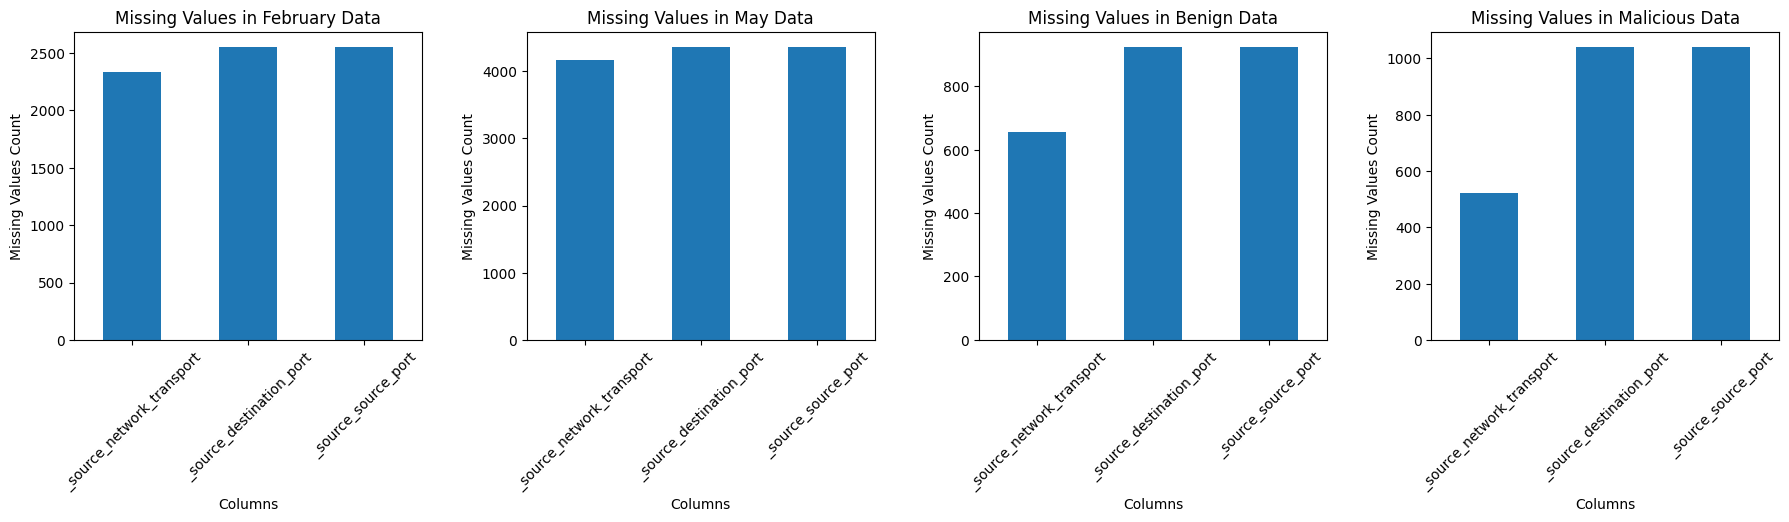

In [118]:
missing_values_february = df_2022_february.isnull().sum()[df_2022_february.isnull().sum() > 0]
missing_values_may = df_2022_may.isnull().sum()[df_2022_may.isnull().sum() > 0]
missing_values_benign = df_2021_may_benign.isnull().sum()[df_2021_may_benign.isnull().sum() > 0]
missing_values_malicious = df_2021_may_malicious.isnull().sum()[df_2021_may_malicious.isnull().sum() > 0]

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 4, figsize=(22, 4))

# Create bar plots for each DataFrame
for i, (missing_values, title) in enumerate(zip(
        [missing_values_february, missing_values_may, missing_values_benign, missing_values_malicious],
        ['February Data', 'May Data', 'Benign Data', 'Malicious Data'])):
    missing_values.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Missing Values in {title}')
    axes[i].set_xlabel('Columns')
    axes[i].set_ylabel('Missing Values Count')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust the subplots' positions for better readability
plt.subplots_adjust(wspace=0.3)

plt.show()

In this case there are only 3 columns - network_transport, destination_port and source_port

## Data Balancing

Graph the difference in benign vs malicious between datasets

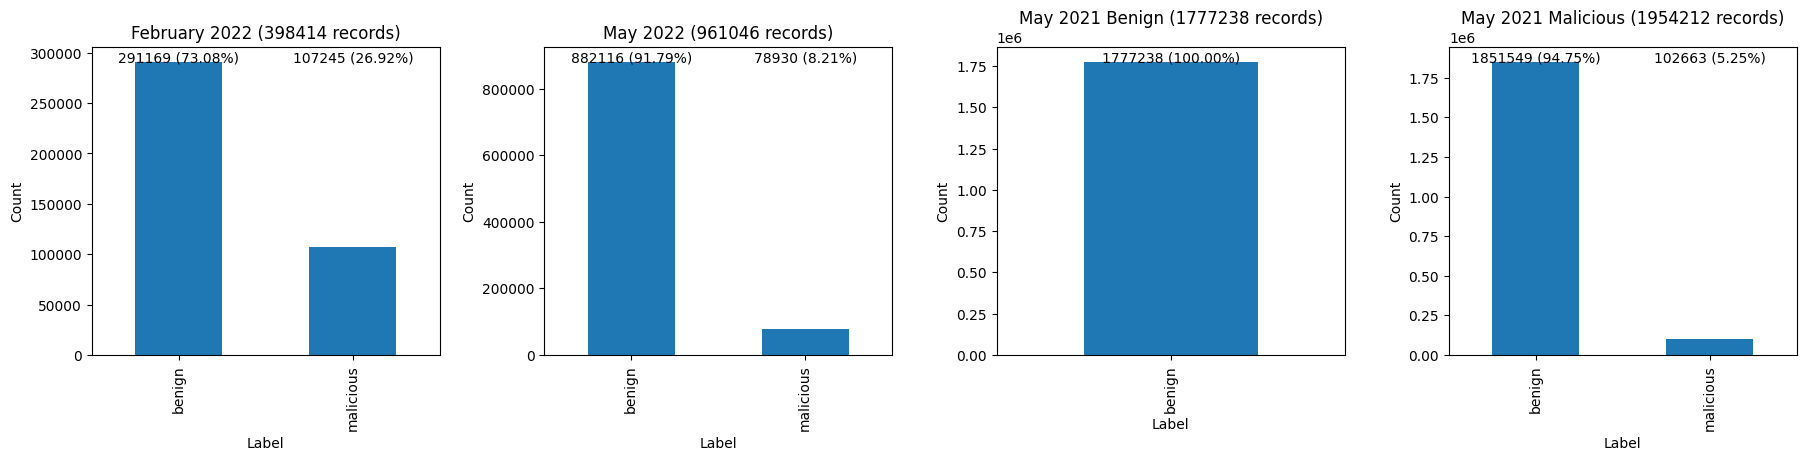

In [119]:
# Printing the value count for each label - malicious and benign
value_counts_2022_february = df_2022_february['label'].value_counts()
value_counts_2022_may = df_2022_may['label'].value_counts()
value_counts_2021_may_benign = df_2021_may_benign['label'].value_counts()
value_counts_2021_may_malicious = df_2021_may_malicious['label'].value_counts()

dataframe_map = [df_2022_february, df_2022_may, df_2021_may_benign, df_2021_may_malicious]

# Create a figure with one subplot
fig, axes = plt.subplots(1, 4, figsize=(22, 4))

for i, (value_counts, title) in enumerate(zip(
        [value_counts_2022_february, value_counts_2022_may, value_counts_2021_may_benign, value_counts_2021_may_malicious],
        [f'February 2022 ({len(df_2022_february)} records)', 
         f'May 2022 ({len(df_2022_may)} records)', 
         f'May 2021 Benign ({len(df_2021_may_benign)} records)', 
         f'May 2021 Malicious ({len(df_2021_may_malicious)} records)'])):

    value_counts.plot(kind='bar', ax=axes[i])

    # Calculate percentages
    total_samples = len(dataframe_map[i])
    percentages = (value_counts / total_samples) * 100

    # Customize the plot
    axes[i].set_title(title)
    axes[i].set_xlabel('Label')
    axes[i].set_ylabel('Count')

    # Add percentages above the bars
    for j, pct in enumerate(percentages):
        axes[i].text(j, value_counts.iloc[0] + 5, f'{value_counts.iloc[j]} ({pct:.2f}%)', ha='center')

# Adjust the subplots' positions for better readability
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()


We can observe that the rows with benign label are much more compared to the malicius, meaning the dataset is highly disbalanced.

C:\Users\Thomas\AppData\Local\Temp\ipykernel_9520\1150387159.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, count, f'{count} ({percentages[i]:.2f}%)', ha='center', va='bottom')


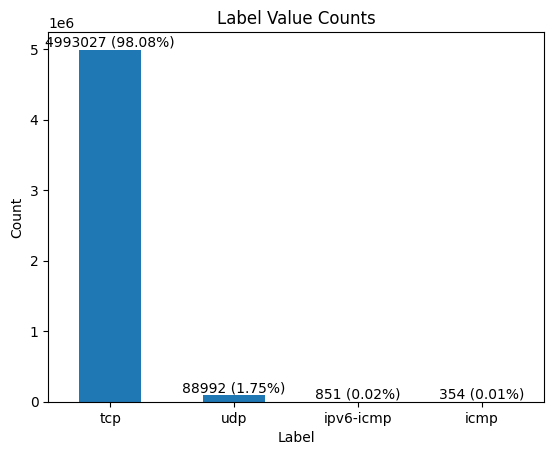

In [120]:
value_counts = df['_source_network_transport'].value_counts()

fig, ax = plt.subplots()

value_counts.plot(kind='bar', ax=ax)

total_samples = len(df)
percentages = (value_counts / total_samples) * 100

for i, count in enumerate(value_counts):
    ax.text(i, count, f'{count} ({percentages[i]:.2f}%)', ha='center', va='bottom')

ax.set_title('Label Value Counts')
ax.set_xlabel('Label')
ax.set_ylabel('Count')
plt.xticks(rotation=0)

plt.show()

Besides, the label, there is also the TCP vs UDP transport split that shows an imbalance in the dataframe between types of networking records

## Merging datasets

In [121]:
df.isnull().sum()[df.isnull().sum() > 0]

_source_network_transport    7686
_source_destination_port     8891
_source_source_port          8891
dtype: int64

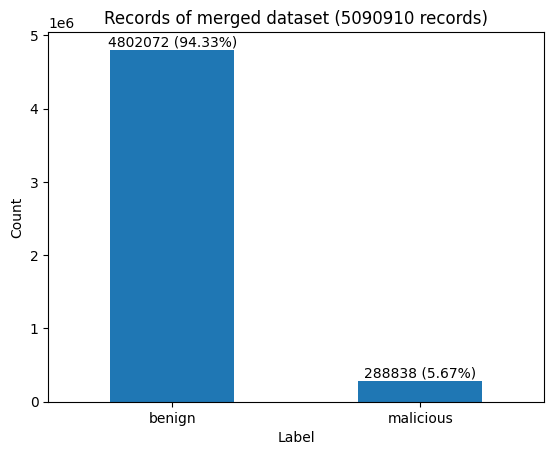

In [122]:
value_counts = df['label'].value_counts()

fig, ax = plt.subplots()

value_counts.plot(kind='bar', ax=ax)

total_samples = len(df)
percentages = (value_counts / total_samples) * 100

for i, count in enumerate(value_counts):
    ax.text(i, count, f'{count} ({percentages.iloc[i]:.2f}%)', ha='center', va='bottom')

ax.set_title(f'Records of merged dataset ({len(df)} records)')
ax.set_xlabel('Label')
ax.set_ylabel('Count')
plt.xticks(rotation=0)

plt.show()

Verify that the datasets were concatenated properly

In [123]:
assert len(df) == len(df_2022_february) + len(df_2022_may) + len(df_2021_may_benign) + len(df_2021_may_malicious)

## Data Cleaning

For cleaning the data, we will remove all the NaN values, and see how that effects the distribution, above we had already computed the 3 features with missing values.

In [124]:
df_cleaned = df.dropna()

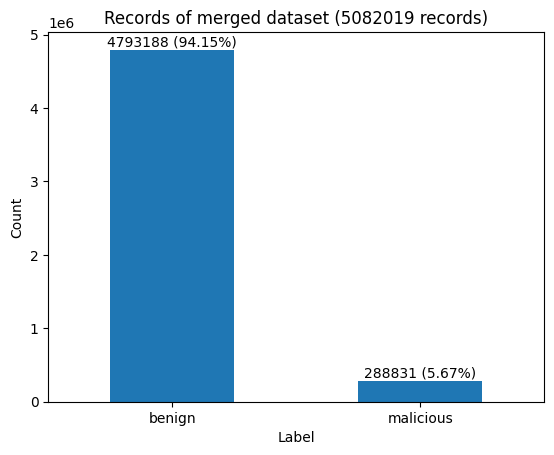

In [125]:
value_counts = df_cleaned['label'].value_counts()

fig, ax = plt.subplots()

value_counts.plot(kind='bar', ax=ax)

total_samples = len(df)
percentages = (value_counts / total_samples) * 100

for i, count in enumerate(value_counts):
    ax.text(i, count, f'{count} ({percentages.iloc[i]:.2f}%)', ha='center', va='bottom')

ax.set_title(f'Records of merged dataset ({len(df_cleaned)} records)')
ax.set_xlabel('Label')
ax.set_ylabel('Count')
plt.xticks(rotation=0)

plt.show()

In [126]:
len(df[df.isnull().any(axis=1)])

8891

The difference is very minimal, as there are only <9000 unique records with a missing value from the ~5.000.000 records

Verify all dataframes were correctly concatenatated by checking the length,  
and save the dataframe to a new csv file for later use

In [128]:
df_cleaned.to_csv(data_dir + 'merged_cleaned_data.csv', index=False)

## One Hot Encoding

In [129]:
df = pd.read_csv(data_dir + 'merged_cleaned_data.csv')
df.head(3)

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_network_transport,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label
0,EAT/////AP//////CP8AAAHAqFSDwKj3AAEIbQI,False,190.215.171.30,190.215.9.27,30684984.0,tcp,2022-02-25T12:20:00.007Z,41662926223,621.0,2049.0,benign
1,EAT/////AP//////CP8AAAHAqFSPwKj3D8CeVCQ,False,190.215.171.17,190.215.9.16,220136.0,tcp,2022-02-25T12:20:00.007Z,41154340691,9300.0,40640.0,benign
2,EAT/////AP//////CP8AAAEKapNUwKj3DvAjvpo,False,190.215.9.17,53.181.234.140,73242.0,tcp,2022-02-25T12:20:00.007Z,41259502779,9200.0,39614.0,benign


The label can be one-hot-encoded into 0 and -1 for benign or malicious respectively

In [130]:
encoded_df = df.copy()
encoded_df['label'] = df['label'].map({'benign': 0, 'malicious': -1})
encoded_df.head(3)

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_network_transport,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label
0,EAT/////AP//////CP8AAAHAqFSDwKj3AAEIbQI,False,190.215.171.30,190.215.9.27,30684984.0,tcp,2022-02-25T12:20:00.007Z,41662926223,621.0,2049.0,0
1,EAT/////AP//////CP8AAAHAqFSPwKj3D8CeVCQ,False,190.215.171.17,190.215.9.16,220136.0,tcp,2022-02-25T12:20:00.007Z,41154340691,9300.0,40640.0,0
2,EAT/////AP//////CP8AAAEKapNUwKj3DvAjvpo,False,190.215.9.17,53.181.234.140,73242.0,tcp,2022-02-25T12:20:00.007Z,41259502779,9200.0,39614.0,0


the network transport type can also be one-hot-encoded for udp and tcp values

In [131]:
encoded_df['udp'] = (encoded_df['_source_network_transport'] == 'udp').astype(int)
encoded_df['tcp'] = (encoded_df['_source_network_transport'] == 'tcp').astype(int)
encoded_df.head(3)

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_network_transport,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label,udp,tcp
0,EAT/////AP//////CP8AAAHAqFSDwKj3AAEIbQI,False,190.215.171.30,190.215.9.27,30684984.0,tcp,2022-02-25T12:20:00.007Z,41662926223,621.0,2049.0,0,0,1
1,EAT/////AP//////CP8AAAHAqFSPwKj3D8CeVCQ,False,190.215.171.17,190.215.9.16,220136.0,tcp,2022-02-25T12:20:00.007Z,41154340691,9300.0,40640.0,0,0,1
2,EAT/////AP//////CP8AAAEKapNUwKj3DvAjvpo,False,190.215.9.17,53.181.234.140,73242.0,tcp,2022-02-25T12:20:00.007Z,41259502779,9200.0,39614.0,0,0,1


Lets save this encoded model

In [132]:
encoded_df.to_csv('merged_cleaned_encoded_data.csv', index=False)

## Flow records
records can also be grouped per flow, this way time-series-like information can be encoded into a single records, as often a single flow is malicious or benign

In [133]:
df = pd.read_csv(data_dir + 'merged_cleaned_encoded_data.csv')
df.head(3)

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_network_transport,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label,udp,tcp
0,EAT/////AP//////CP8AAAHAqFSDwKj3AAEIbQI,False,190.215.171.30,190.215.9.27,30684984.0,tcp,2022-02-25T12:20:00.007Z,41662926223,621.0,2049.0,0,0,1
1,EAT/////AP//////CP8AAAHAqFSPwKj3D8CeVCQ,False,190.215.171.17,190.215.9.16,220136.0,tcp,2022-02-25T12:20:00.007Z,41154340691,9300.0,40640.0,0,0,1
2,EAT/////AP//////CP8AAAEKapNUwKj3DvAjvpo,False,190.215.9.17,53.181.234.140,73242.0,tcp,2022-02-25T12:20:00.007Z,41259502779,9200.0,39614.0,0,0,1


In [134]:
df[df['_source_flow_id'] == 'EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU']

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_network_transport,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label,udp,tcp
146,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,408.0,tcp,2022-02-25T12:20:00.092Z,30066825097,5601.0,7625.0,0,0,1
452,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,544.0,tcp,2022-02-25T12:20:00.007Z,14839076349,5601.0,7625.0,0,0,1
708,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,408.0,tcp,2022-02-25T12:19:50.002Z,30066825097,5601.0,7625.0,0,0,1
960,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,544.0,tcp,2022-02-25T12:19:50.007Z,14839076349,5601.0,7625.0,0,0,1
1135,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,True,190.215.171.28,190.215.9.17,840.0,tcp,2022-02-25T12:20:40.092Z,45206860361,5601.0,7625.0,0,0,1
1342,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,1408.0,tcp,2022-02-25T12:20:40.107Z,29712554471,5601.0,7625.0,0,0,1
1556,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,272.0,tcp,2022-02-25T12:19:40.002Z,14998853348,5601.0,7625.0,0,0,1
1859,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,272.0,tcp,2022-02-25T12:19:40.108Z,57160,5601.0,7625.0,0,0,1
2021,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,840.0,tcp,2022-02-25T12:20:30.002Z,45206860361,5601.0,7625.0,0,0,1
2262,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,1408.0,tcp,2022-02-25T12:20:30.000Z,29712554471,5601.0,7625.0,0,0,1


In [164]:
import numpy as np

flow_df = df.copy()
# Convert the timestamp column to datetime type
flow_df['_source_@timestamp'] = pd.to_datetime(flow_df['_source_@timestamp'])
# Add a new column for the amount of packets
flow_df['packets'] = np.ones(len(flow_df))
# byte information for finding deviation
flow_df['min_network_bytes'] = flow_df['_source_network_bytes']
flow_df['max_network_bytes'] = flow_df['_source_network_bytes']
# duration information for finding deviation
flow_df['min_source_event_duration'] = flow_df['_source_event_duration']
flow_df['max_source_event_duration'] = flow_df['_source_event_duration']
# timestamp information for finding deviation
flow_df['min_source_timestamp'] = flow_df['_source_@timestamp']
flow_df['max_source_timestamp'] = flow_df['_source_@timestamp']
# source flow final count
flow_df['final_flow_count'] = flow_df['_source_flow_final']
# Squash the records
flow_df = flow_df.sort_values(by='_source_@timestamp', ascending=False).groupby('_source_flow_id')

squash_rules = {
    '_source_event_duration': 'sum',
    '_source_network_bytes': 'sum',
    'packets': 'sum',
    'label': 'min',
    # Extra feature values for calculating byte data
    'min_network_bytes': 'min',
    'max_network_bytes': 'max',
    # Extra feature values for calculating event duration
    'min_source_event_duration': 'min',
    'max_source_event_duration': 'max',
    # Extra feature values for calculating flow duration
    'min_source_timestamp': 'min',
    'max_source_timestamp': 'max',
    # Extra feature for the count of final flow records within a flow
    'final_flow_count': 'sum'
}

flow_df = flow_df.agg(squash_rules).reset_index()

In [165]:
print(flow_df.shape)
flow_df.head(3)

(237601, 12)


,_source_flow_id,_source_event_duration,_source_network_bytes,packets,label,min_network_bytes,max_network_bytes,min_source_event_duration,max_source_event_duration,min_source_timestamp,max_source_timestamp,final_flow_count
0,EAL/////AP////8I//8AAAEAAAAA/////0QAQwA,0,1690.0,5.0,0,338.0,338.0,0,0,2021-05-23 15:38:08.533000+00:00,2021-05-23 15:38:48.533000+00:00,1
1,EAL/////AP////8I//8AAAEKAAICCgACD0MARAA,503552,23288.0,27.0,0,592.0,924.0,0,30254,2021-05-21 01:24:40.195000+00:00,2021-05-24 15:38:58.532000+00:00,5
2,EAL/////AP////8I//8AAAEKAAIDCgACDzUA+dU,1763084,744.0,4.0,0,186.0,186.0,440771,440771,2022-05-04 16:40:40.320000+00:00,2022-05-04 16:41:10.325000+00:00,1


Now that the dataframe is squashed based on flow_id, we can calculate and rename any features that could be important

In [166]:
flow_df['duration'] = (flow_df['max_source_timestamp'] - flow_df['min_source_timestamp'])
flow_df.rename(columns={'_source_event_duration': 'source_event_duration', '_source_network_bytes': 'source_network_bytes_sum'})

,_source_flow_id,source_event_duration,source_network_bytes_sum,packets,label,min_network_bytes,max_network_bytes,min_source_event_duration,max_source_event_duration,min_source_timestamp,max_source_timestamp,final_flow_count,duration
0,EAL/////AP////8I//8AAAEAAAAA/////0QAQwA,0,1690.0,5.0,0,338.0,338.0,0,0,2021-05-23 15:38:08.533000+00:00,2021-05-23 15:38:48.533000+00:00,1,0 days 00:00:40
1,EAL/////AP////8I//8AAAEKAAICCgACD0MARAA,503552,23288.0,27.0,0,592.0,924.0,0,30254,2021-05-21 01:24:40.195000+00:00,2021-05-24 15:38:58.532000+00:00,5,3 days 14:14:18.337000
2,EAL/////AP////8I//8AAAEKAAIDCgACDzUA+dU,1763084,744.0,4.0,0,186.0,186.0,440771,440771,2022-05-04 16:40:40.320000+00:00,2022-05-04 16:41:10.325000+00:00,1,0 days 00:00:30.005000
3,EAL/////AP////8I//8AAAEKAAIDCgACDzUA35Y,779242764,1208.0,4.0,0,302.0,302.0,194810691,194810691,2022-02-25 13:38:20.108000+00:00,2022-02-25 13:38:50.020000+00:00,1,0 days 00:00:29.912000
4,EAL/////AP////8I//8AAAEKAAIDCgACDzUA37U,0,558.0,6.0,0,93.0,93.0,0,0,2022-02-25 13:24:50.095000+00:00,2022-02-25 13:25:40.001000+00:00,1,0 days 00:00:49.906000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237596,QAT///////8A////IP8AAAEAAAAAAAAAAAAAAAAAAAABAA...,616429,3956.0,23.0,0,172.0,172.0,22770,41937,2021-05-20 21:34:50.196000+00:00,2021-05-24 08:15:28.533000+00:00,5,3 days 10:40:38.337000
237597,QAT///////8A////IP8AAAEAAAAAAAAAAAAAAAAAAAABAA...,600427,4988.0,29.0,0,172.0,172.0,15844,23174,2021-05-20 18:37:50.195000+00:00,2022-05-04 15:45:10.320000+00:00,6,348 days 21:07:20.125000
237598,QAT///////8A////IP8AAAEAAAAAAAAAAAAAAAAAAAABAA...,172860,1376.0,8.0,0,172.0,172.0,20478,22737,2021-05-21 06:53:50.197000+00:00,2021-05-24 11:25:58.532000+00:00,2,3 days 04:32:08.335000
237599,QAT///////8A////IP8AAAEAAAAAAAAAAAAAAAAAAAABAA...,220700,1720.0,10.0,0,172.0,172.0,21900,22325,2021-05-23 23:17:38.532000+00:00,2021-05-24 05:22:58.533000+00:00,2,0 days 06:05:20.001000


Now lets sanity check that the squashed flow df does not include any missing values

In [167]:
len(flow_df[flow_df.isnull().any(axis=1)])

0

Lets create a function that can be used to translate the encoded label to human string

In [ ]:
def to_human_label(label):
    human_label = "Benign"
    if (label == -1): 
        human_label = "Malicious"
    return human_label

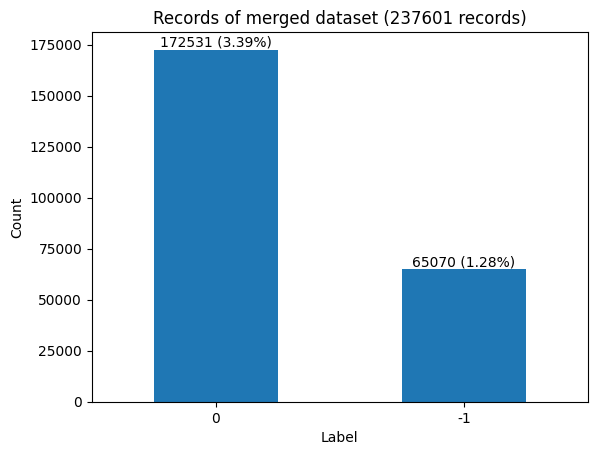

In [169]:
value_counts = flow_df['label'].value_counts()

fig, ax = plt.subplots()

value_counts.plot(kind='bar', ax=ax)

total_samples = len(df)
percentages = (value_counts / total_samples) * 100

for i, count in enumerate(value_counts):
    ax.text(i, count, f'{count} ({percentages.iloc[i]:.2f}%)', ha='center', va='bottom')

ax.set_title(f'Records of merged dataset ({len(flow_df)} records)')
ax.set_xlabel('Label')
ax.set_ylabel('Count')
plt.xticks(rotation=0)

plt.show()

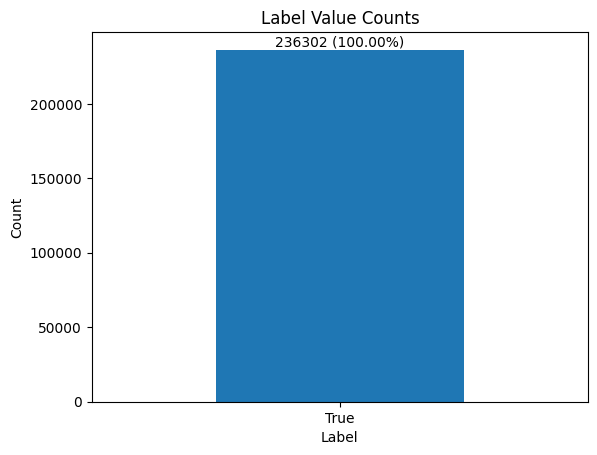

In [25]:
value_counts = result_df['_source_flow_final'].value_counts()

fig, ax = plt.subplots()

value_counts.plot(kind='bar', ax=ax)

total_samples = len(result_df)
percentages = (value_counts / total_samples) * 100

for i, count in enumerate(value_counts):
    ax.text(i, count, f'{count} ({percentages[i]:.2f}%)', ha='center', va='bottom')

ax.set_title('Label Value Counts')
ax.set_xlabel('Label')
ax.set_ylabel('Count')
plt.xticks(rotation=0)

plt.show()

In [ ]:
# Google-colab export to HTML
# # Load the notebook
# with open("/content/drive/MyDrive/Fontys/SUE/datapreprocessing.ipynb", "r", encoding="utf-8") as f:
#     notebook = nbformat.read(f, as_version=4)

# # Convert to HTML
# html_exporter = HTMLExporter()
# html_data, _ = html_exporter.from_notebook_node(notebook)

# # Save the HTML data to a file
# with open("/content/drive/MyDrive/Fontys/SUE/datapreprocessing.html", "w", encoding="utf-8") as f:
#     f.write(html_data)